In [39]:
import sys
import scipy
import numpy
import matplotlib
import sklearn
import pandas

print ('Python: {}:'.format(sys.version))
print( 'Scipy: {}'.format(scipy.__version__))
print( 'numpy: {}'.format(numpy.__version__))
print( 'matplotlib: {}'.format(matplotlib.__version__))
print( 'sklearn: {}'.format(sklearn.__version__))
print( 'pandas: {}'.format(pandas.__version__))

Python: 3.7.7 (default, Mar 10 2020, 15:43:33) 
[Clang 11.0.0 (clang-1100.0.33.17)]:
Scipy: 1.4.1
numpy: 1.18.2
matplotlib: 3.2.1
sklearn: 0.22.2.post1
pandas: 1.0.3


In [7]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [23]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [9]:
print (dataset.shape)

(150, 5)


In [10]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [12]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [15]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


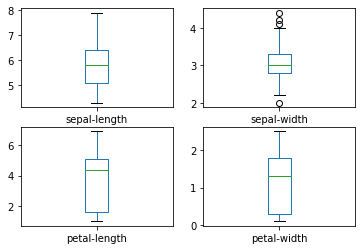

In [19]:
#Box and Whisker Plots
dataset.plot(kind = 'box', subplots = 'true', layout=(2,2))
pyplot.show()

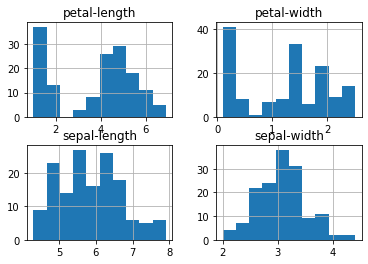

In [27]:
#Histogram
dataset.hist()
pyplot.show()

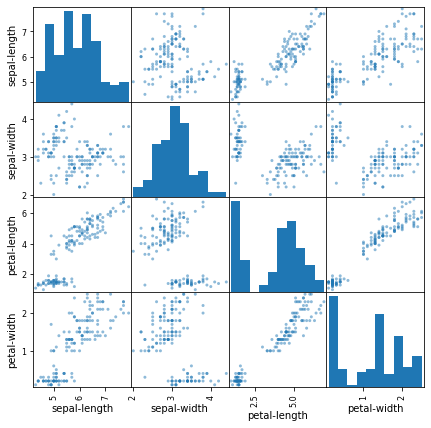

In [52]:
#Inter-Variable relations
pandas.plotting.scatter_matrix(dataset, figsize=(7, 7))
pyplot.show()

In [57]:
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
array = dataset.values
X = array[:,0:4]
Y = array[:, 4]
X_Train, X_Validation, Y_Train, Y_Validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=1)

In [98]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = sklearn.model_selection.cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print ('%s, %f, (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LR, 0.941667, (0.065085)
LDA, 0.975000, (0.038188)
KNN, 0.958333, (0.041667)
CART, 0.950000, (0.055277)
NB, 0.950000, (0.055277)
SVM, 0.983333, (0.033333)


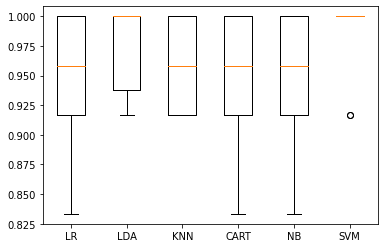

In [99]:
#Compare Algorithms
pyplot.boxplot(results, labels = names)
pyplot.show()

In [102]:
#Make Predictions on Validaton Data Set
model = SVC(gamma='auto')
model.fit(X_Train, Y_Train)
predictions = model.predict(X_Validation)

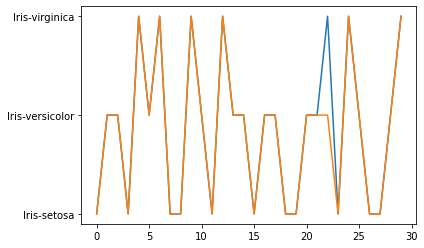

In [104]:
pyplot.plot(predictions)
pyplot.plot(Y_Validation)
pyplot.show()

In [107]:
print(accuracy_score(Y_Validation, predictions))
print(confusion_matrix(Y_Validation, predictions))
print(classification_report(Y_Validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# YAY